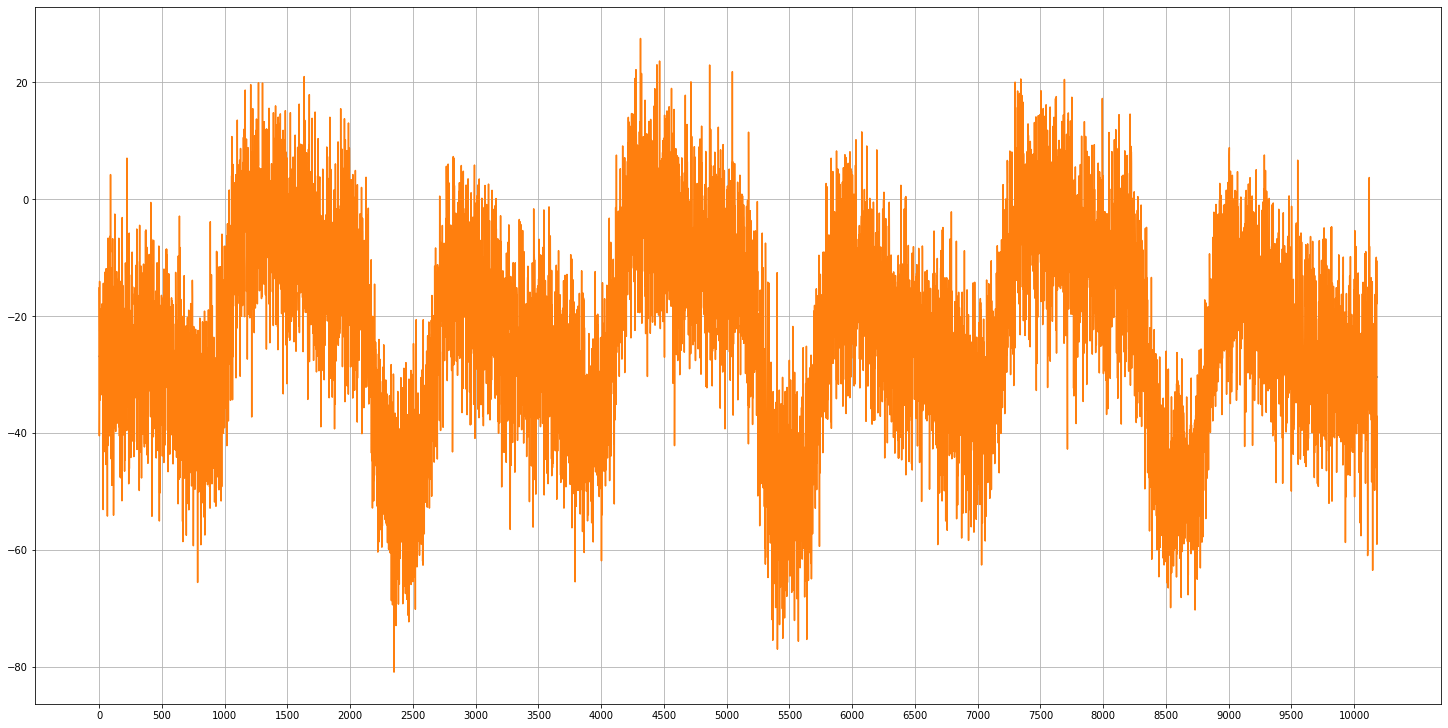

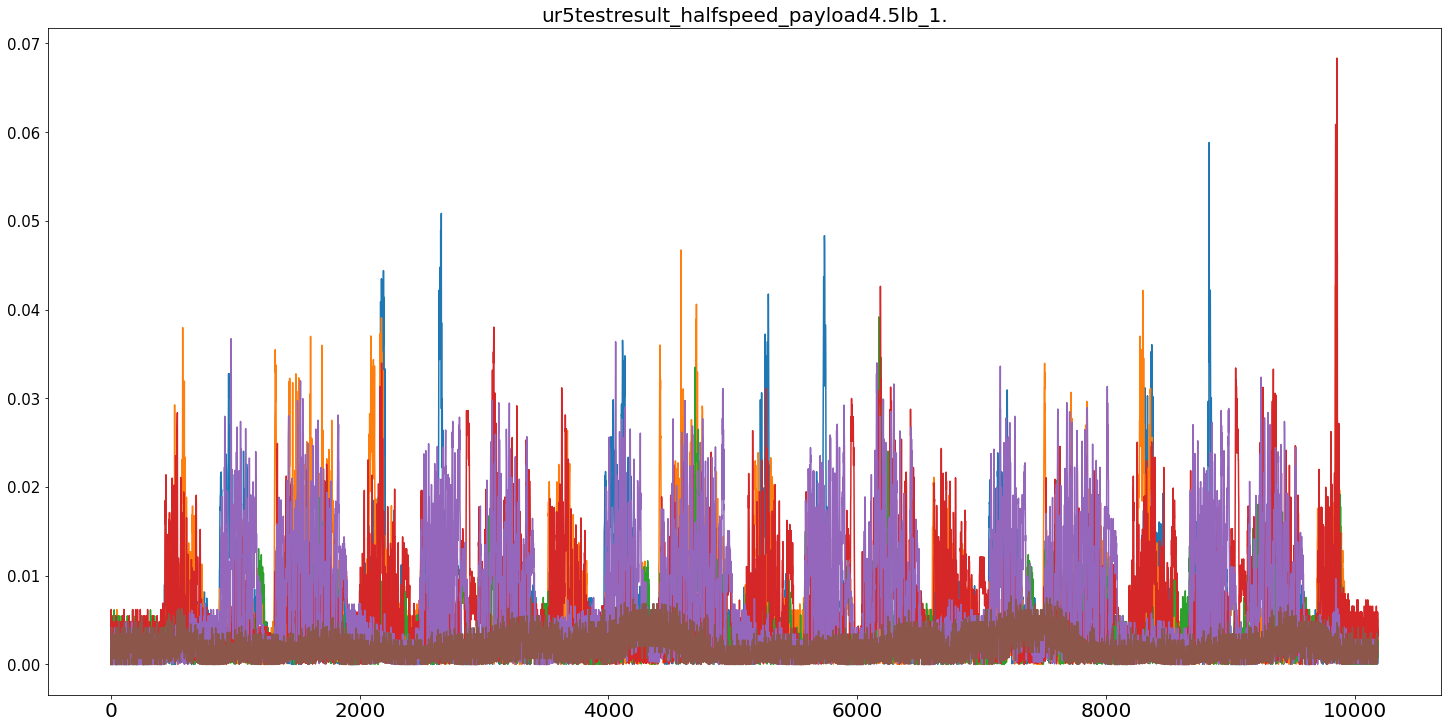

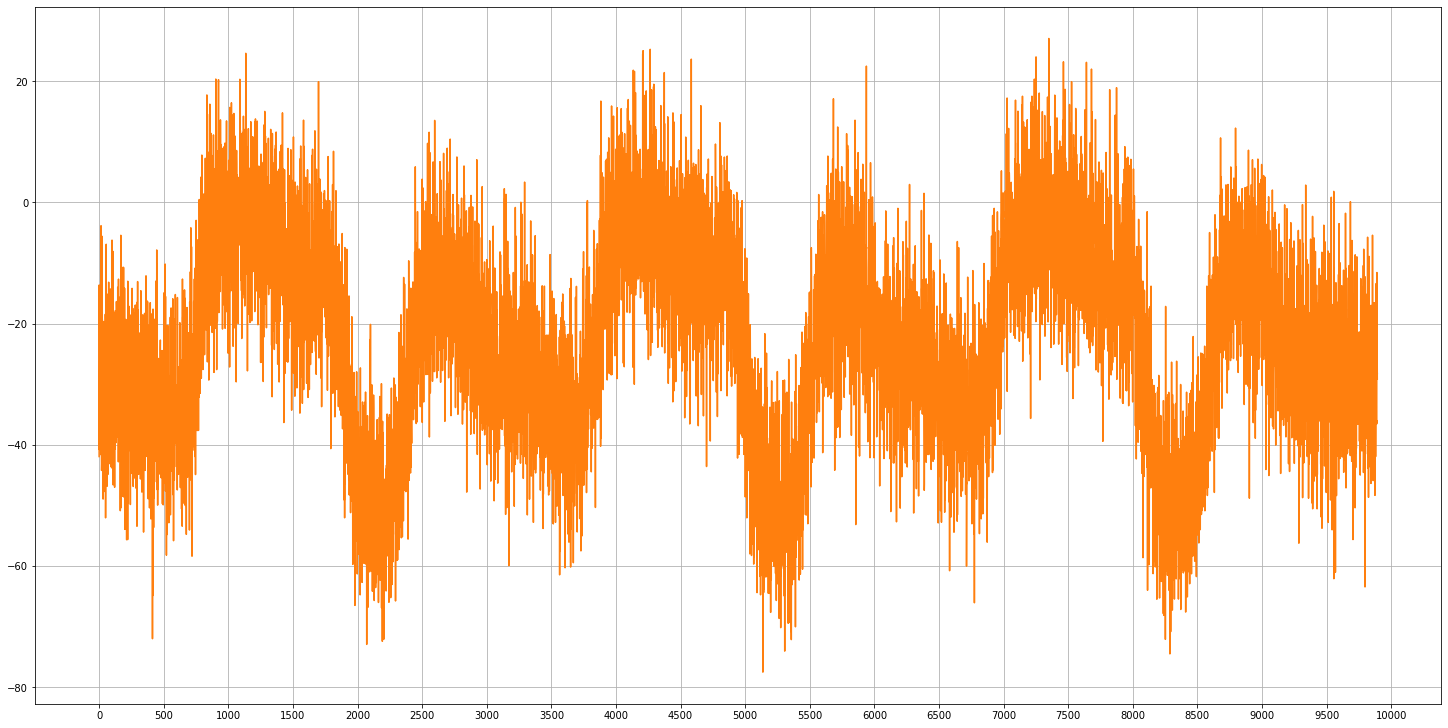

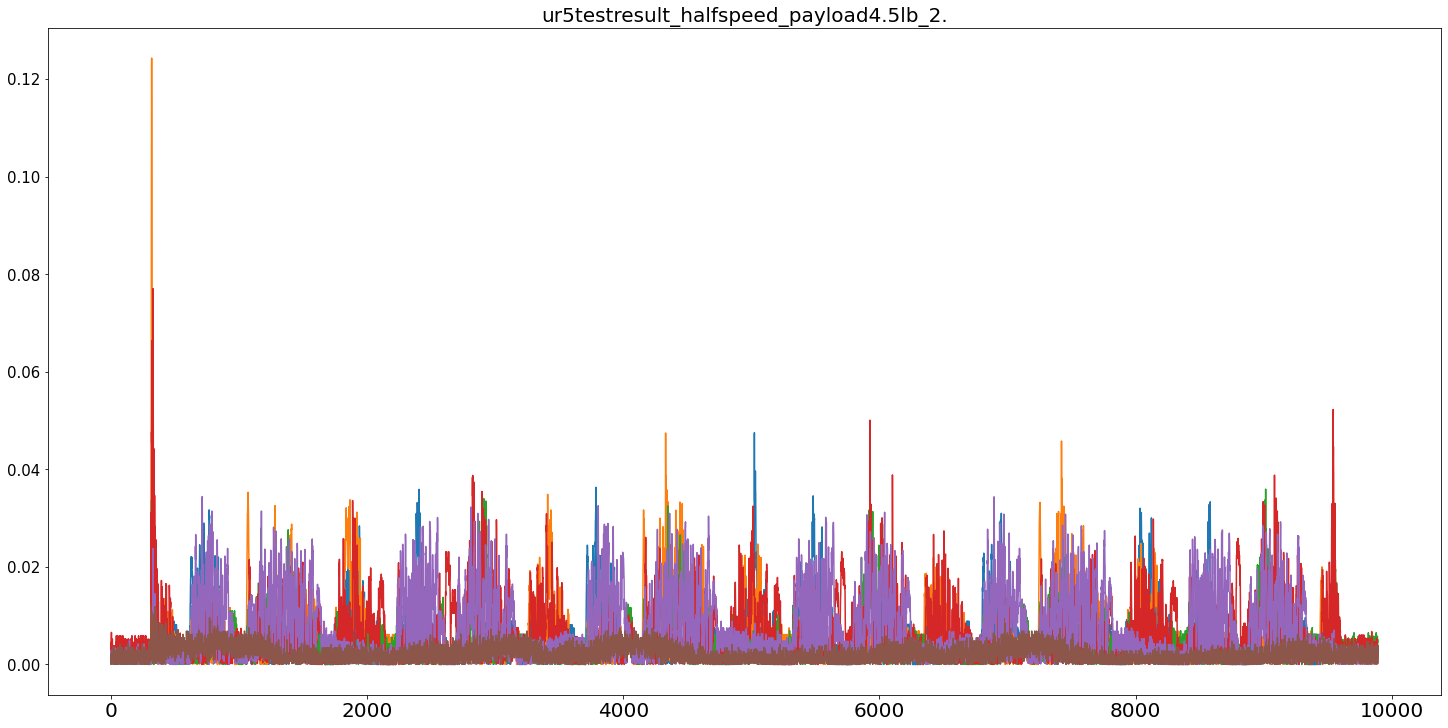

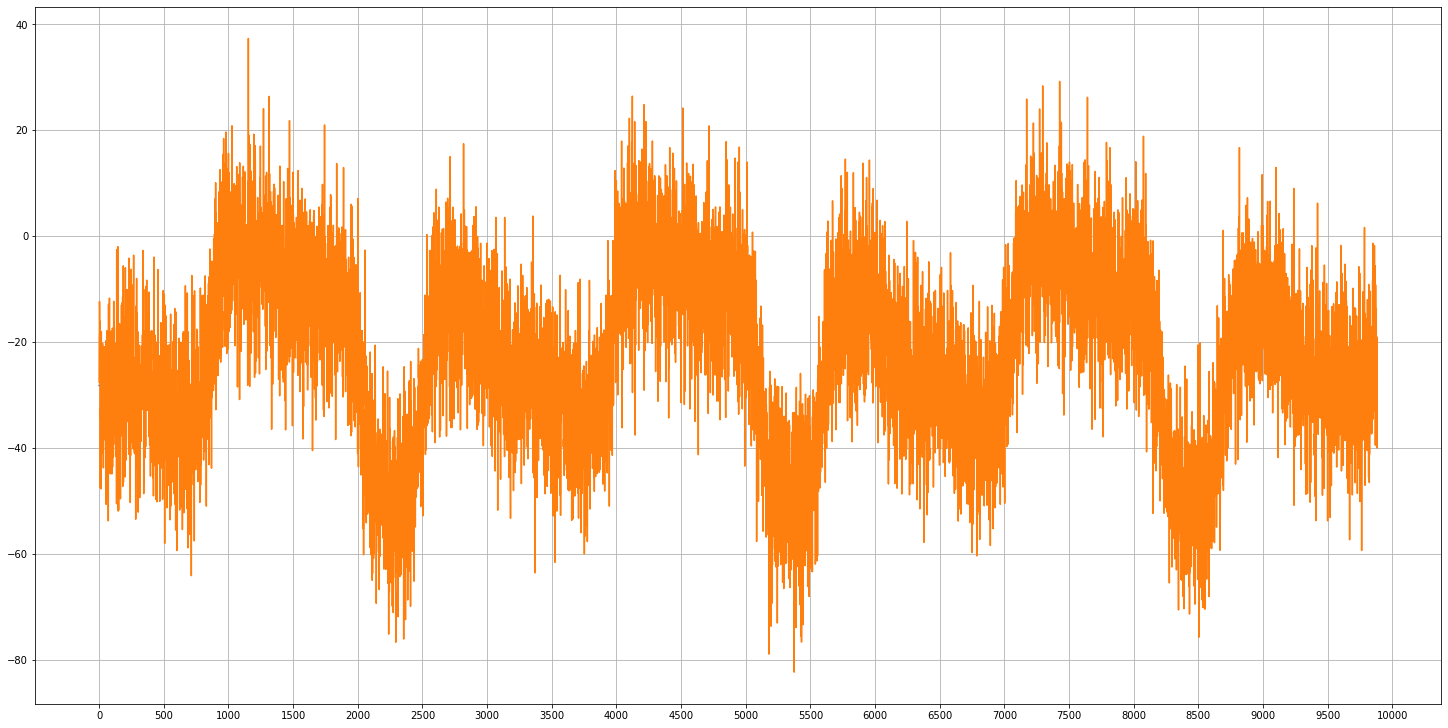

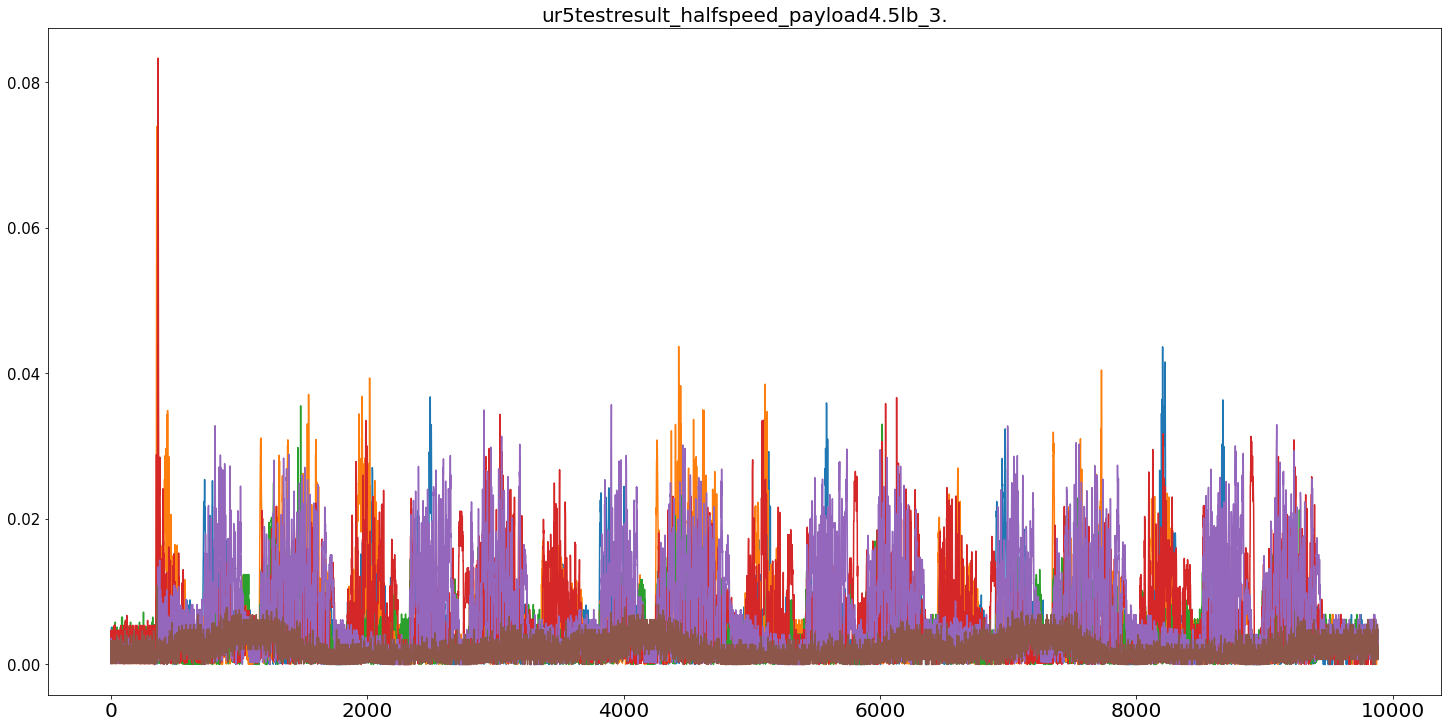

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance

#header:
# 0 ROBOT_TIME
# 1 ROBOT_TARGET_JOINT_POSITIONS (J1)
# 2 ROBOT_TARGET_JOINT_POSITIONS (J2)
# 3 ROBOT_TARGET_JOINT_POSITIONS (J3)
# 4 ROBOT_TARGET_JOINT_POSITIONS (J4)
# 5 ROBOT_TARGET_JOINT_POSITIONS (J5)
# 6 ROBOT_TARGET_JOINT_POSITIONS (J6)
# 7 ROBOT_ACTUAL_JOINT_POSITIONS (J1)
# 8 ROBOT_ACTUAL_JOINT_POSITIONS (J2)
# 9 ROBOT_ACTUAL_JOINT_POSITIONS (J3)
# 10 ROBOT_ACTUAL_JOINT_POSITIONS (J4)
# 11 ROBOT_ACTUAL_JOINT_POSITIONS (J5)
# 12 ROBOT_ACTUAL_JOINT_POSITIONS (J6)

# 13 ROBOT_TARGET_JOINT_VELOCITIES (J1)
# 14 ROBOT_TARGET_JOINT_VELOCITIES (J2)
# 15 ROBOT_TARGET_JOINT_VELOCITIES (J3)
# 16 ROBOT_TARGET_JOINT_VELOCITIES (J4)
# 17 ROBOT_TARGET_JOINT_VELOCITIES (J5)
# 18 ROBOT_TARGET_JOINT_VELOCITIES (J6)
# 19 ROBOT_ACTUAL_JOINT_VELOCITIES (J1)
# 20 ROBOT_ACTUAL_JOINT_VELOCITIES (J2)
# 21 ROBOT_ACTUAL_JOINT_VELOCITIES (J3)
# 22 ROBOT_ACTUAL_JOINT_VELOCITIES (J4)
# 23 ROBOT_ACTUAL_JOINT_VELOCITIES (J5)
# 24 ROBOT_ACTUAL_JOINT_VELOCITIES (J6)

# 25 ROBOT_TARGET_JOITN_CURRENT (J1)
# 26 ROBOT_TARGET_JOITN_CURRENT (J2)
# 27 ROBOT_TARGET_JOITN_CURRENT (J3)
# 28 ROBOT_TARGET_JOITN_CURRENT (J4)
# 29 ROBOT_TARGET_JOITN_CURRENT (J5)
# 30 ROBOT_TARGET_JOITN_CURRENT (J6)
# 31 ROBOT_ACTUAL_JOINT_CURRENT (J1)
# 32 ROBOT_ACTUAL_JOINT_CURRENT (J2)
# 33 ROBOT_ACTUAL_JOINT_CURRENT (J3)
# 34 ROBOT_ACTUAL_JOINT_CURRENT (J4)
# 35 ROBOT_ACTUAL_JOINT_CURRENT (J5)
# 36 ROBOT_ACTUAL_JOINT_CURRENT (J6)

# 37 ROBOT_TARGET_JOINT_ACCELERATIONS (J1)
# 38 ROBOT_TARGET_JOINT_ACCELERATIONS (J2)
# 39 ROBOT_TARGET_JOINT_ACCELERATIONS (J3)
# 40 ROBOT_TARGET_JOINT_ACCELERATIONS (J4)
# 41 ROBOT_TARGET_JOINT_ACCELERATIONS (J5)
# 42 ROBOT_TARGET_JOINT_ACCELERATIONS (J6)
# 43 ROBOT_TARGET_JOINT_TORQUES (J1)
# 44 ROBOT_TARGET_JOINT_TORQUES (J2)
# 45 ROBOT_TARGET_JOINT_TORQUES (J3)
# 46 ROBOT_TARGET_JOINT_TORQUES (J4)
# 47 ROBOT_TARGET_JOINT_TORQUES (J5)
# 48 ROBOT_TARGET_JOINT_TORQUES (J6)
# 49 ROBOT_JOINT_CONTROL_CURRENT (J1)
# 50 ROBOT_JOINT_CONTROL_CURRENT (J2)
# 51 ROBOT_JOINT_CONTROL_CURRENT (J3)
# 52 ROBOT_JOINT_CONTROL_CURRENT (J4)
# 53 ROBOT_JOINT_CONTROL_CURRENT (J5)
# 54 ROBOT_JOINT_CONTROL_CURRENT (J6)
# 55 ROBOT_CARTESIAN_COORD_TOOL (x)
# 56 ROBOT_CARTESIAN_COORD_TOOL (y)
# 57 ROBOT_CARTESIAN_COORD_TOOL (z)
# 58 ROBOT_CARTESIAN_COORD_TOOL (rx)
# 59 ROBOT_CARTESIAN_COORD_TOOL (ry)
# 60 ROBOT_CARTESIAN_COORD_TOOL (rz)
# 61 ROBOT_TCP_FORCE (x)
# 62 ROBOT_TCP_FORCE (y)
# 63 ROBOT_TCP_FORCE (z)
# 64 ROBOT_TCP_FORCE (rx)
# 65 ROBOT_TCP_FORCE (ry)
# 66 ROBOT_TCP_FORCE (rz)
# 67 ROBOT_JOINT_TEMP (J1)
# 68 ROBOT_JOINT_TEMP (J2)
# 69 ROBOT_JOINT_TEMP (J3)
# 70 ROBOT_JOINT_TEMP (J4)
# 71 ROBOT_JOINT_TEMP (J5)
# 72 ROBOT_JOINT_TEMP (J6)



#path
DataSet_path = "E:/Server_mantain/robotic_arm/NIST_Dataset"
raw_data = "ur5testresult_halfspeed_payload4.5lb_1.csv"
header_name_txt = os.path.join(DataSet_path,"header.txt")

def Euclidean_error(data_arr,target_head,target_tail):
    Euclidean_error_list = []
    for i in range(data_arr.shape[0]):
        raw_Euclidean_error_list = []
        for j in range(target_head,target_tail+1):
            Euclidean_error = distance.euclidean(data_arr[i,j], data_arr[i,j+6])
            raw_Euclidean_error_list.append(Euclidean_error)
        Euclidean_error_list.append(raw_Euclidean_error_list)
    Euclidean_error = np.array(Euclidean_error_list)
    return Euclidean_error


#get header
with open(header_name_txt) as f:
    header_list = f.readline().split("\t")
    #header_list[-1] = header_list[-1].split("\n")[0]   

#read data
#ur5testresult_fullspeed_payload4.5lb_3
#ur5testresult_halfspeed_payload4.5lb_2


for i in range(1,4):
    
    fig = plt.figure(constrained_layout=True, figsize=(20,10))
    title = "ur5testresult_halfspeed_payload4.5lb_{}.csv".format(i)
    df_raw = pd.read_csv(os.path.join(DataSet_path,title),names=header_list)
    noise = np.random.normal(0,10,df_raw.shape[0])
    plt.plot(df_raw.iloc[:,1])
    plt.plot(df_raw.iloc[:,7]+noise)
    plt.xticks(range(0,10500,500))
    plt.grid()
    plt.show()

    fig = plt.figure(constrained_layout=True, figsize=(20,10))
    robot_arm_arr = df_raw.values
    result = Euclidean_error(robot_arm_arr,1,6)
    fig_title = title.split("csv")[0]
    plt.title(fig_title,fontsize=20)
    plt.plot(result)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.savefig("NIST_images/{}".format(fig_title+"jpg"))
    plt.show()
    







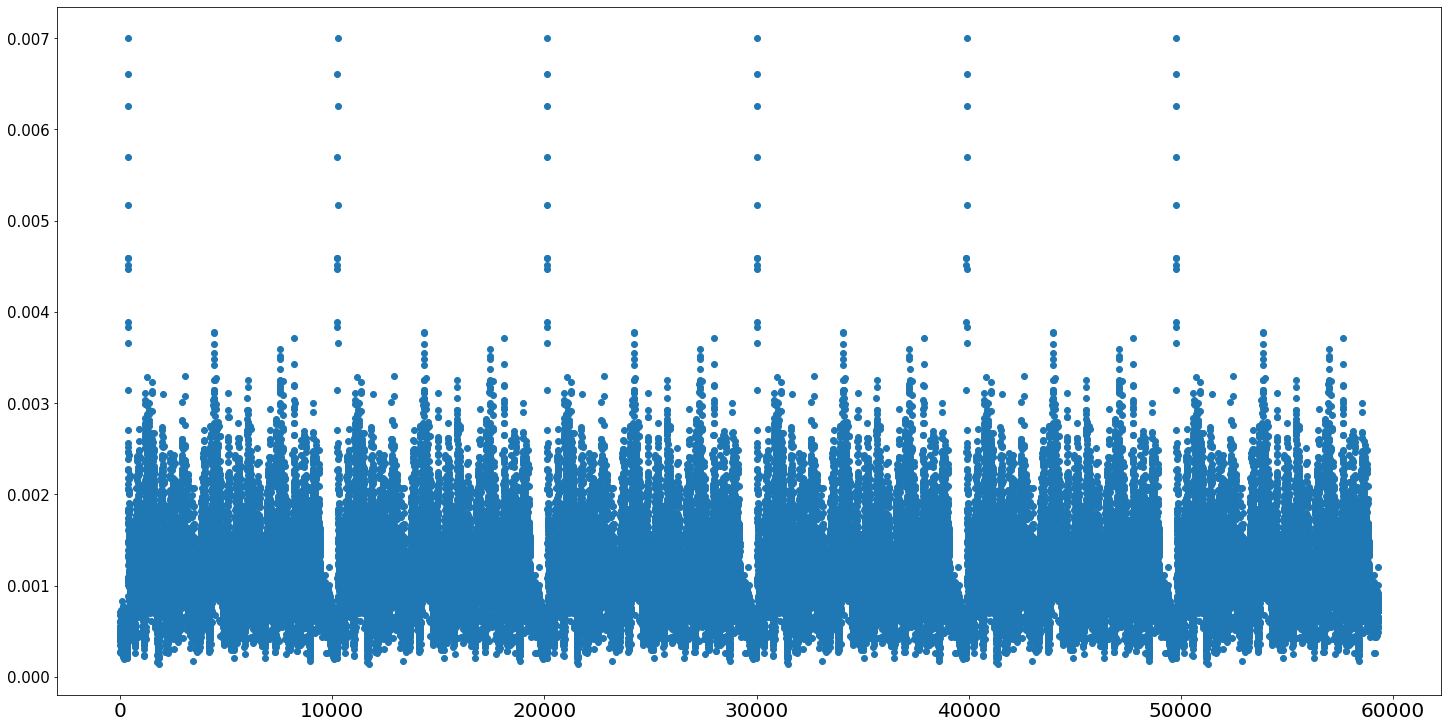

In [44]:
def noise_fun(noise_force):
    noise = np.random.normal(-noise_force,noise_force,(df_raw.shape[0],6))
    return noise

def Euclidean_error(data_arr,target_head,target_tail):
    Euclidean_error_list = []
    for i in range(data_arr.shape[0]):
        raw_Euclidean_error_list = []
        for j in range(target_head,target_tail+1):
            Euclidean_error = distance.euclidean(data_arr[i,j], data_arr[i,j+6])
            raw_Euclidean_error_list.append(Euclidean_error)
        Euclidean_error_list.append((sum(raw_Euclidean_error_list)/len(raw_Euclidean_error_list))/4)
    Euclidean_error = np.array(Euclidean_error_list)
    return Euclidean_error

test_arr = df_raw.values
add_arr = test_arr.copy()
noise_force = 1
for i in range(5):

    if i <=4:
        
        test_arr = np.concatenate([test_arr,add_arr],axis=0)
    else:
        test_arr = np.concatenate([test_arr[:,],add_arr+noise_fun(0.1)],axis=0)

fig = plt.figure(constrained_layout=True, figsize=(20,10))
result = Euclidean_error(test_arr,1,6)
plt.scatter(x=range(result.shape[0]),y=result)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()



In [14]:
for num,i in enumerate(header_list):
    print(num,i)

0 ROBOT_TIME
1 ROBOT_TARGET_JOINT_POSITIONS (J1)
2 ROBOT_TARGET_JOINT_POSITIONS (J2)
3 ROBOT_TARGET_JOINT_POSITIONS (J3)
4 ROBOT_TARGET_JOINT_POSITIONS (J4)
5 ROBOT_TARGET_JOINT_POSITIONS (J5)
6 ROBOT_TARGET_JOINT_POSITIONS (J6)
7 ROBOT_ACTUAL_JOINT_POSITIONS (J1)
8 ROBOT_ACTUAL_JOINT_POSITIONS (J2)
9 ROBOT_ACTUAL_JOINT_POSITIONS (J3)
10 ROBOT_ACTUAL_JOINT_POSITIONS (J4)
11 ROBOT_ACTUAL_JOINT_POSITIONS (J5)
12 ROBOT_ACTUAL_JOINT_POSITIONS (J6)
13 ROBOT_TARGET_JOINT_VELOCITIES (J1)
14 ROBOT_TARGET_JOINT_VELOCITIES (J2)
15 ROBOT_TARGET_JOINT_VELOCITIES (J3)
16 ROBOT_TARGET_JOINT_VELOCITIES (J4)
17 ROBOT_TARGET_JOINT_VELOCITIES (J5)
18 ROBOT_TARGET_JOINT_VELOCITIES (J6)
19 ROBOT_ACTUAL_JOINT_VELOCITIES (J1)
20 ROBOT_ACTUAL_JOINT_VELOCITIES (J2)
21 ROBOT_ACTUAL_JOINT_VELOCITIES (J3)
22 ROBOT_ACTUAL_JOINT_VELOCITIES (J4)
23 ROBOT_ACTUAL_JOINT_VELOCITIES (J5)
24 ROBOT_ACTUAL_JOINT_VELOCITIES (J6)
25 ROBOT_TARGET_JOITN_CURRENT (J1)
26 ROBOT_TARGET_JOITN_CURRENT (J2)
27 ROBOT_TARGET_JOITN_CURR

Text(0.5, 0.98, 'Target data vs real data diversity and distributions')

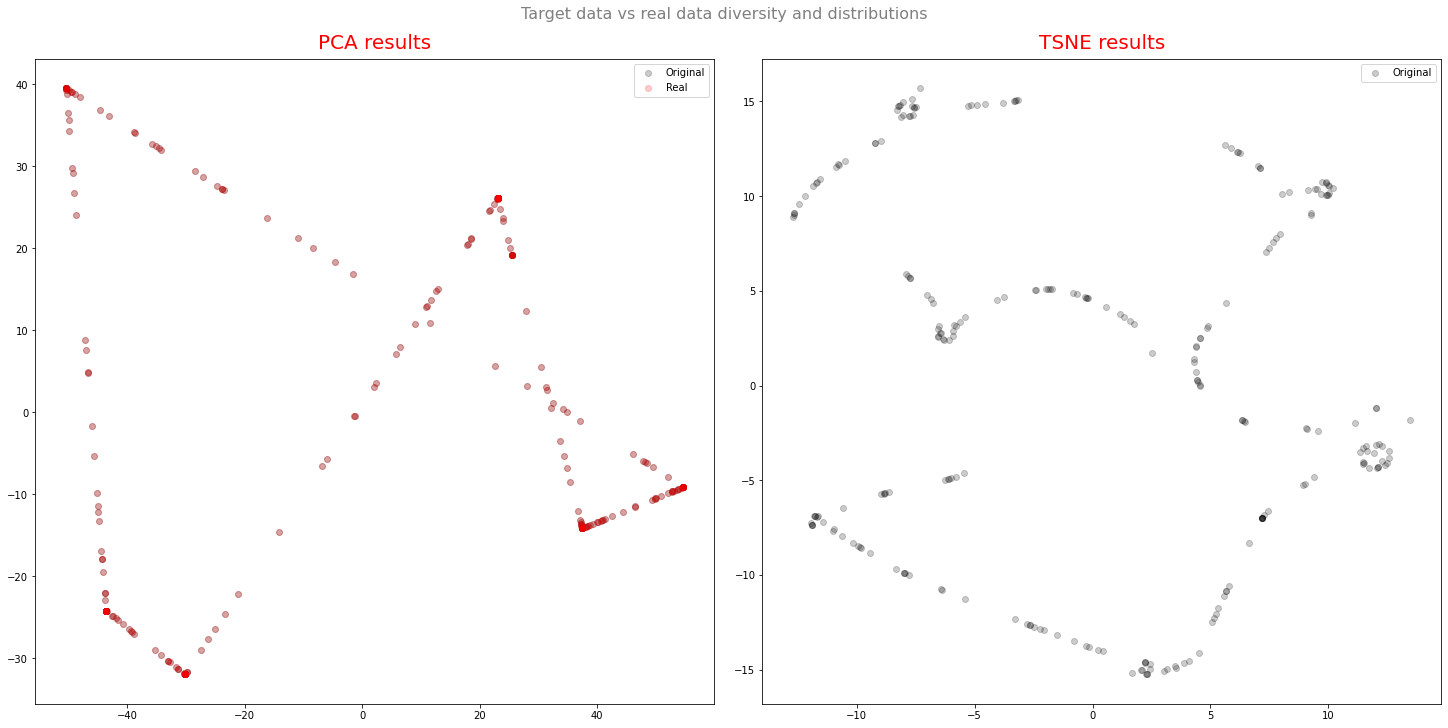

In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


sample_size = 250


idx = np.random.permutation(robot_arm_arr.shape[0])[:sample_size]

target_sample = robot_arm_arr[idx,1:7]
real_sample = robot_arm_arr[idx,1:7]





n_components = 2
pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, n_iter=300)

#The fit of the methods must be done only using the real sequential data
pca.fit(target_sample)

pca_real = pd.DataFrame(pca.transform(target_sample))
pca_synth = pd.DataFrame(pca.transform(real_sample))


data_reduced = np.concatenate((target_sample, real_sample), axis=0)
tsne_results = pd.DataFrame(tsne.fit_transform(data_reduced))



#The scatter plots for PCA and TSNE methods
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(20,10))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#TSNE scatter plot
ax = fig.add_subplot(spec[0,0])
ax.set_title('PCA results',
             fontsize=20,
             color='red',
             pad=10)

#PCA scatter plot
plt.scatter(pca_real.iloc[:, 0].values, pca_real.iloc[:,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(pca_synth.iloc[:,0], pca_synth.iloc[:,1],
            c='red', alpha=0.2, label='Real')
ax.legend()

ax2 = fig.add_subplot(spec[0,1])
ax2.set_title('TSNE results',
              fontsize=20,
              color='red',
              pad=10)

plt.scatter(tsne_results.iloc[:sample_size, 0].values, tsne_results.iloc[:sample_size,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(tsne_results.iloc[sample_size:,0], tsne_results.iloc[sample_size:,1],
            c='red', alpha=0.2, label='Real')

ax2.legend()

fig.suptitle('Target data vs real data diversity and distributions',
             fontsize=16,
             color='grey')